In [2]:
import xgboost
print(xgboost.__version__)

1.0.2


In [3]:
import lightgbm
print(lightgbm.__version__)

2.3.1


In [4]:
#Import modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load the data
train=pd.read_csv('train_data1.csv')
test=pd.read_csv('test_data1.csv')


In [6]:
train.shape

(125973, 42)

In [7]:
test.shape

(10000, 43)

In [8]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [9]:
test.columns

Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [10]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,icmp,50,4,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos
125969,8,udp,50,2,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,icmp,55,2,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,icmp,31,4,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [11]:
#Dropping the unnecessary "Unnamed" column 
test = test.drop('Unnamed: 0',axis=1)
test


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,icmp,25,2,315,2537,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
9996,0,icmp,25,2,238,6882,0,0,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
9997,0,udp,50,2,54,55,0,0,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
9998,0,icmp,25,2,228,5210,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [12]:
#Combining train and test files into one dataframe (new)
new=pd.concat([train,test],ignore_index=True)
new

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135968,0,icmp,25,2,315,2537,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
135969,0,icmp,25,2,238,6882,0,0,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
135970,0,udp,50,2,54,55,0,0,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
135971,0,icmp,25,2,228,5210,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [13]:
new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [14]:
new.shape

(135973, 42)

In [15]:
#To see how many different classes are on xAtack target column
new.xAttack.value_counts()

normal    71672
dos       49259
probe     12709
r2l        2194
u2r         139
Name: xAttack, dtype: int64

###### For learning purpose, we will simulate a binary class (normal vs attack) by re-structuring the dataset. We will remove dos, probe and r2l data, to keep only one class of attack(r2l) in the xAttack column (target feature)

In [16]:
todrop=['dos','probe','u2r']
data=new[~new['xAttack'].isin(todrop)]
data.reset_index(drop=True, inplace=True)
data.xAttack.value_counts()

normal    71672
r2l        2194
Name: xAttack, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73866 entries, 0 to 73865
Data columns (total 42 columns):
duration                       73866 non-null int64
protocol_type                  73866 non-null object
service                        73866 non-null int64
flag                           73866 non-null int64
src_bytes                      73866 non-null int64
dst_bytes                      73866 non-null int64
land                           73866 non-null int64
wrong_fragment                 73866 non-null int64
urgent                         73866 non-null int64
hot                            73866 non-null int64
num_failed_logins              73866 non-null int64
logged_in                      73866 non-null int64
num_compromised                73866 non-null int64
root_shell                     73866 non-null int64
su_attempted                   73866 non-null int64
num_root                       73866 non-null int64
num_file_creations             73866 non-null int64
num_sh

In [18]:
#We see that protocol_type is the only categorical feature and has three types of values: icmp, udp and tcp. 
data['protocol_type'].value_counts()

icmp    59055
udp     13454
tcp      1357
Name: protocol_type, dtype: int64

In [19]:
#Transform the only categorical feature into numerical features by using dummy encoder
pt=pd.get_dummies(data['protocol_type'])
pt

,icmp,tcp,udp
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
73861,1,0,0
73862,1,0,0
73863,0,0,1
73864,1,0,0


In [20]:
#Drop the old 'protocol_type' column and append the dummy columns to main df
new_data = data.drop('protocol_type', axis=1)
data = pt.join(new_data)
data

,icmp,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,1,0,0,0,20,2,491,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,0,1,0,45,2,146,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,1,0,0,0,25,2,232,8153,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,1,0,0,0,25,2,199,420,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,1,0,0,0,25,2,287,2251,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,1,0,0,0,25,2,315,2537,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
73862,1,0,0,0,25,2,238,6882,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
73863,0,0,1,0,50,2,54,55,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
73864,1,0,0,0,25,2,228,5210,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [21]:
#Replacing values on the target column
data.xAttack.replace(['normal', 'r2l'], [0, 1], inplace=True)
data=data.rename(columns={"xAttack": "class"})
data

,icmp,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,0,0,20,2,491,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,1,0,45,2,146,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,1,0,0,0,25,2,232,8153,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,1,0,0,0,25,2,199,420,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,1,0,0,0,25,2,287,2251,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,1,0,0,0,25,2,315,2537,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
73862,1,0,0,0,25,2,238,6882,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,0
73863,0,0,1,0,50,2,54,55,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,0
73864,1,0,0,0,25,2,228,5210,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0


In [22]:
data.describe()

,icmp,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,7.386600e+04,7.386600e+04,73866.000000,73866.000000,...,73866.000000,73866.000000,73866.000000,73866.00000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000,73866.000000
mean,0.799488,0.018371,0.182141,166.973195,27.939566,2.033385,1.675130e+04,5.301268e+03,0.000095,0.000866,...,188.724366,0.813836,0.039556,0.12876,0.026354,0.013461,0.005954,0.045079,0.042178,0.029702
std,0.400386,0.134290,0.385963,1318.540558,13.345938,0.641886,4.259157e+05,9.685039e+04,0.009734,0.048248,...,93.514485,0.322668,0.128103,0.26661,0.068895,0.089739,0.055821,0.190986,0.186849,0.169766
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,1.210000e+02,9.300000e+01,0.000000,0.000000,...,114.000000,0.760000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,25.000000,2.000000,2.330000e+02,3.740000e+02,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,25.000000,2.000000,3.240000e+02,2.062750e+03,0.000000,0.000000,...,255.000000,1.000000,0.020000,0.08000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,57715.000000,66.000000,11.000000,8.958152e+07,7.028652e+06,1.000000,3.000000,...,255.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


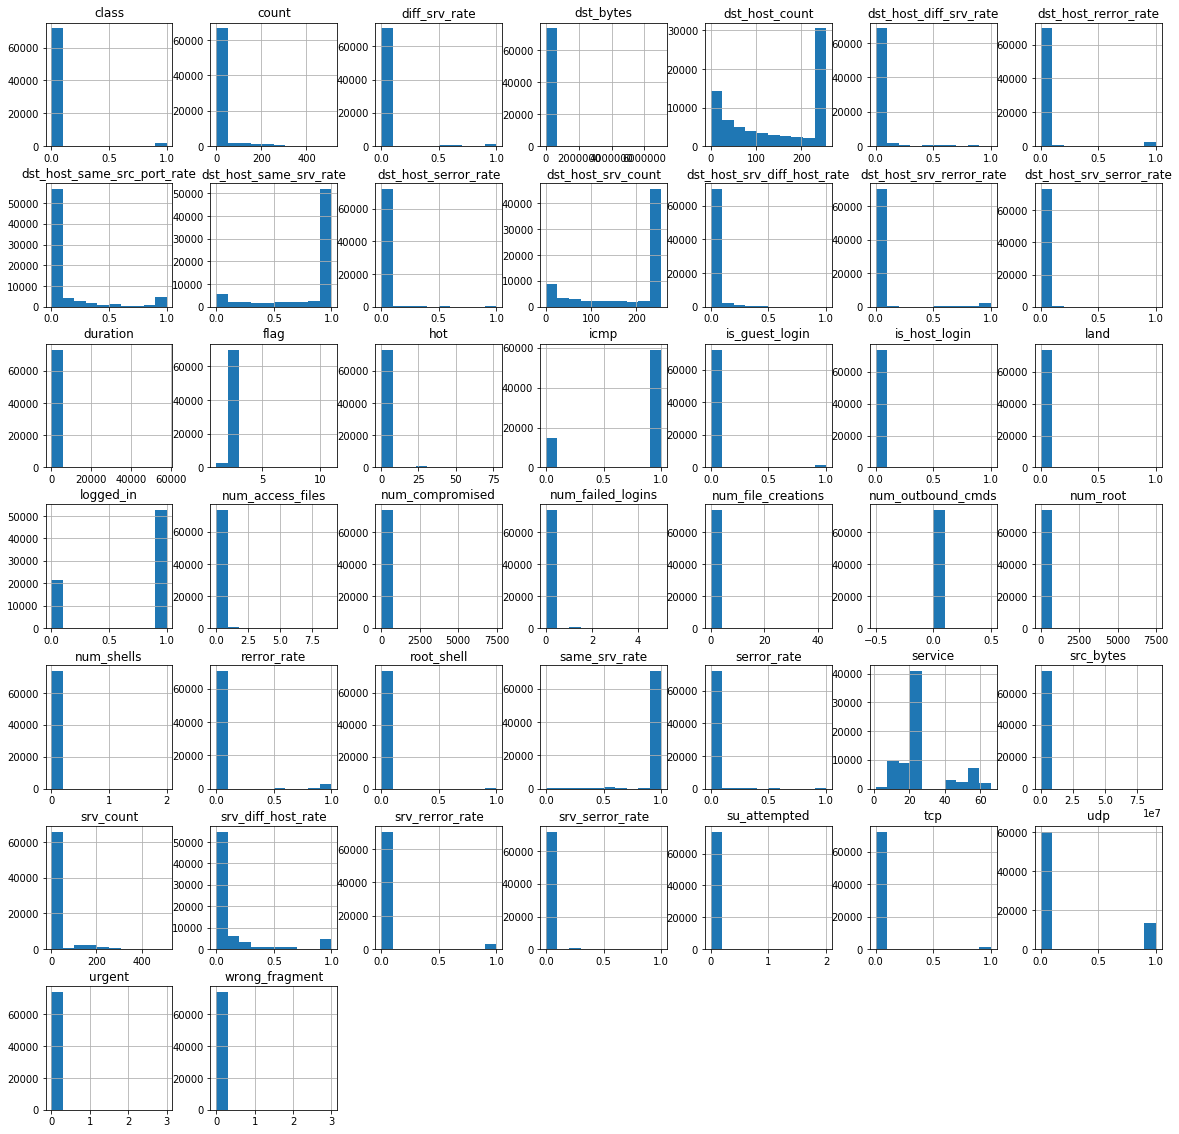

In [23]:
data.hist(figsize=(20,20))
plt.show()

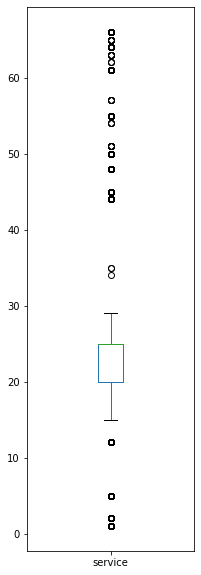

In [24]:
#Many features have outliers, this shows an example 
data['service'].plot(kind='box', figsize=(3,10))
#plt.title()
#plt.ylabel('')
plt.show()

In [25]:
data.isnull().values.any()


False

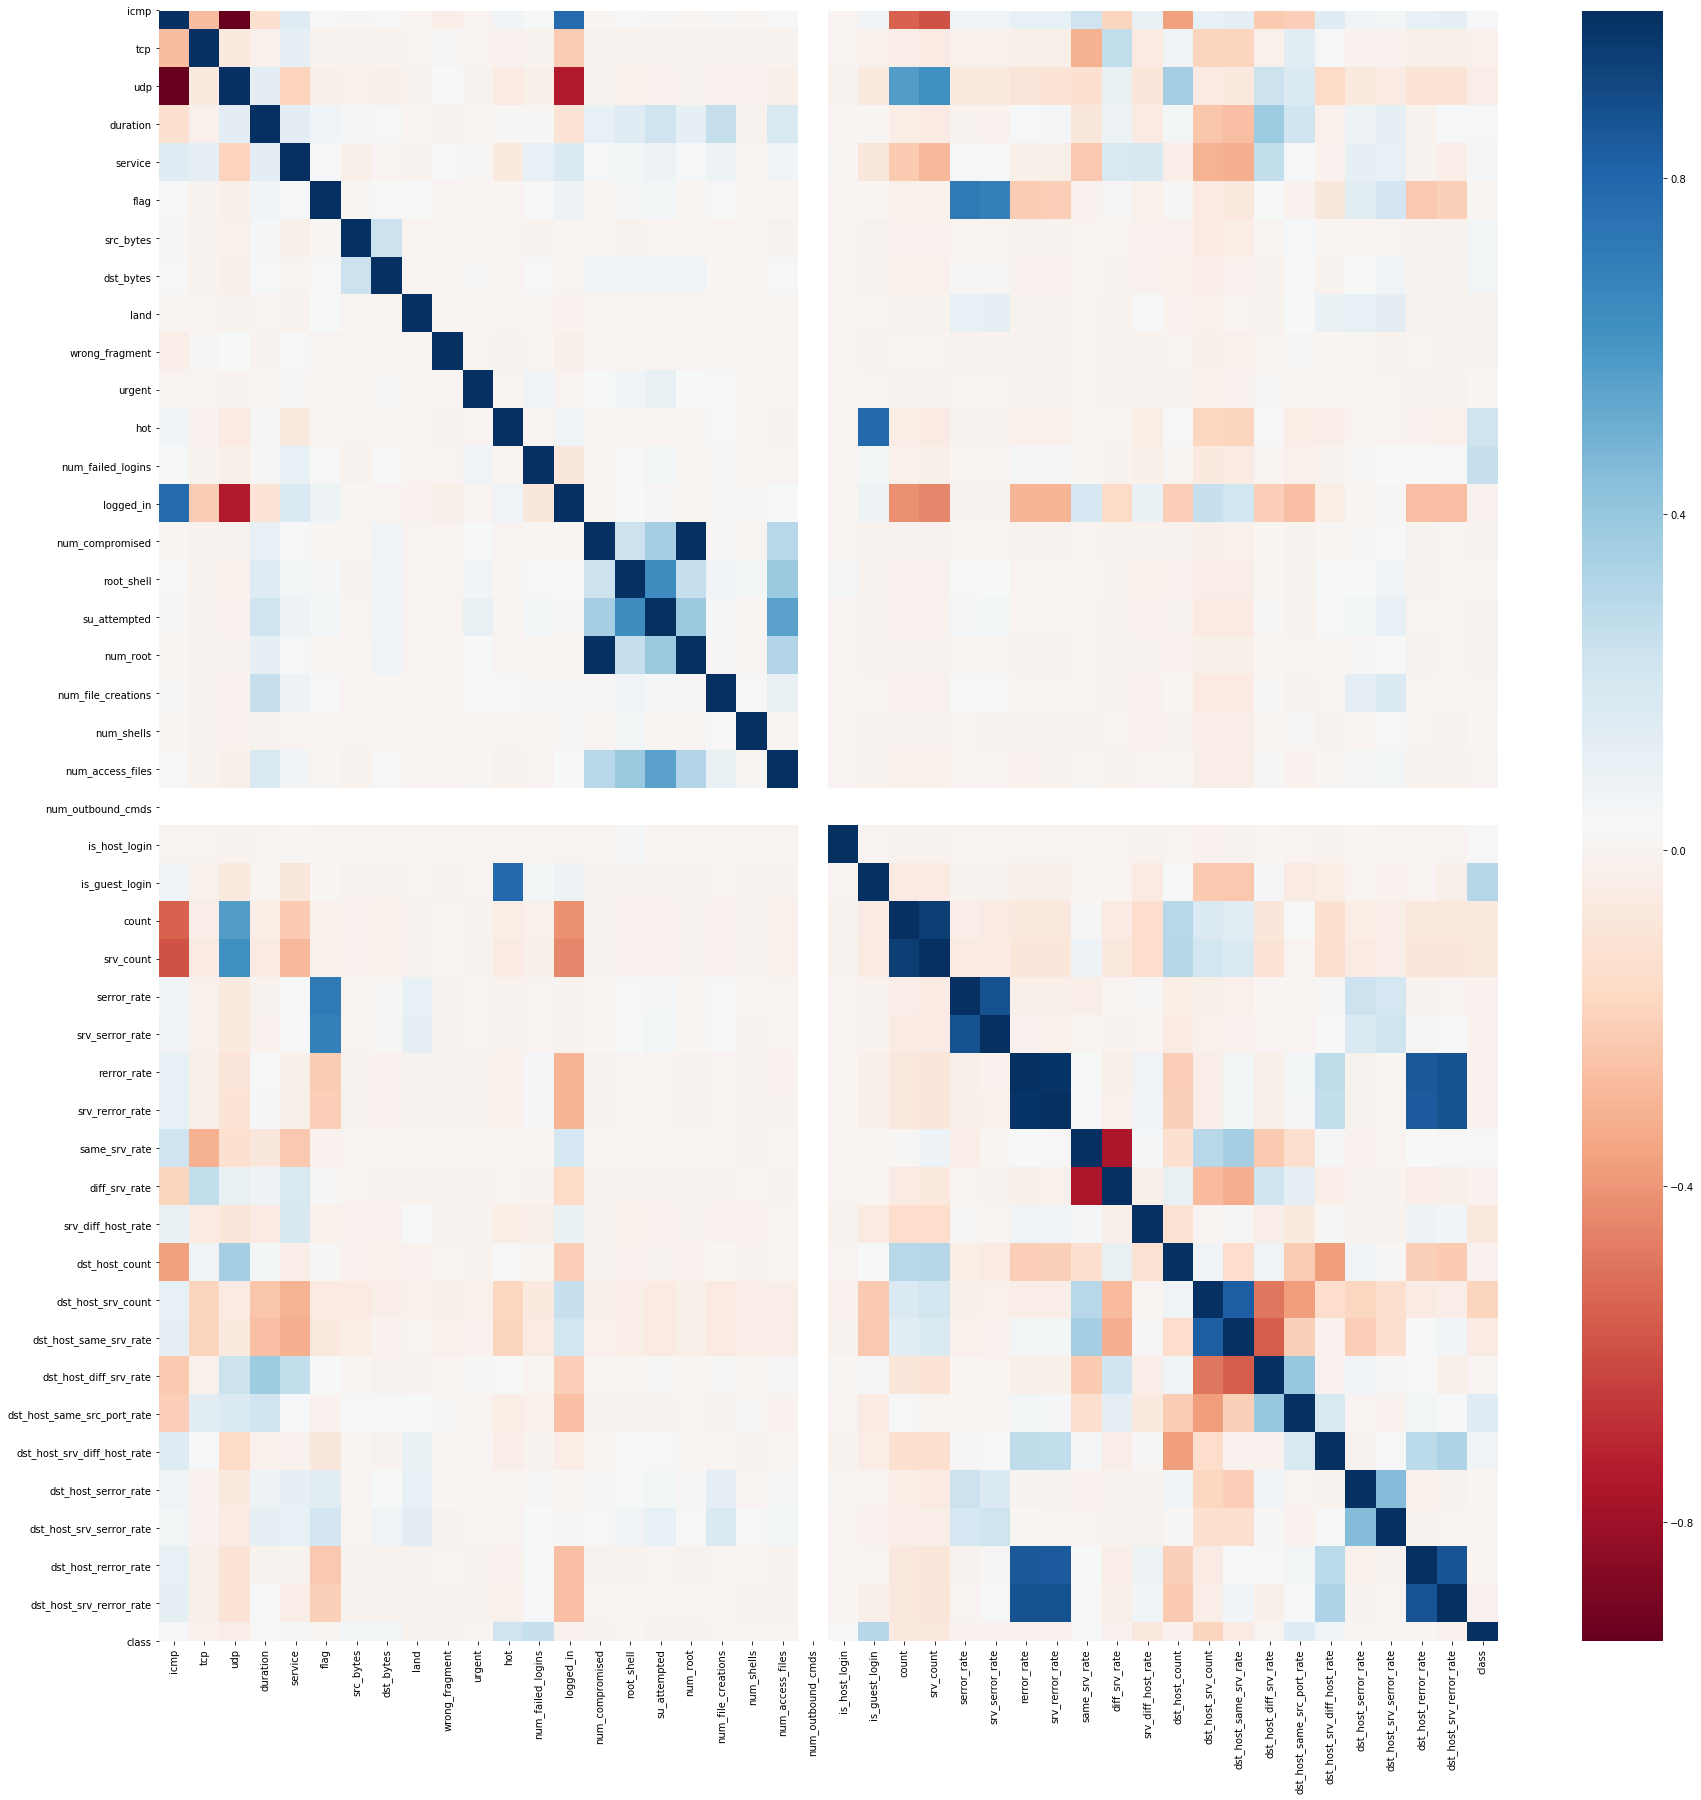

In [26]:
corr=data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap=plt.cm.RdBu)
plt.show()

In [27]:
#Separating data features from label feature
X = data.drop(['class'], axis=1)
y=data['class']
X

,icmp,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,0,20,2,491,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,0,1,0,45,2,146,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,1,0,0,0,25,2,232,8153,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,1,0,0,0,25,2,199,420,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0,0,0,25,2,287,2251,0,0,...,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,1,0,0,0,25,2,315,2537,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
73862,1,0,0,0,25,2,238,6882,0,0,...,7,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00
73863,0,0,1,0,50,2,54,55,0,0,...,255,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00
73864,1,0,0,0,25,2,228,5210,0,0,...,129,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00


In [28]:
y.head(15000).value_counts()

0    14765
1      235
Name: class, dtype: int64

In [29]:
y.tail(15000).value_counts()

0    13666
1     1334
Name: class, dtype: int64

0    71672
1     2194
Name: class, dtype: int64


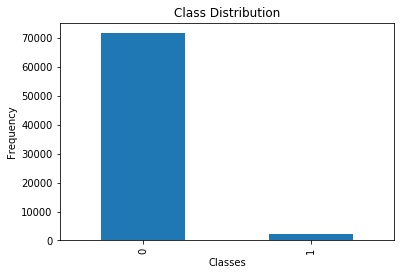

In [30]:
#Class distribution of the target column
count_classes = y.value_counts()
count_classes.plot(kind = 'bar')
plt.title("Class Distribution")
plt.xticks
plt.xlabel("Classes")
plt.ylabel("Frequency")
print(count_classes)

In [31]:
# sklearn train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=0)

In [32]:
#FEATURE NORMALIZATION TO USE ON CERTAIN MODELS (KNN, SVC, Regularized regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)
X_train2 = pd.DataFrame(X_train1, index=X_train.index, columns = X_train.columns)
X_test2 = pd.DataFrame(X_test1, index=X_test.index, columns = X_test.columns)
X2=pd.concat([X_train2,X_test2],ignore_index=True)

In [33]:
X_train1

array([[ 0.50041805, -0.13629123, -0.47174173, ..., -0.10595355,
        -0.02856382, -0.22605289],
       [ 0.50041805, -0.13629123, -0.47174173, ..., -0.10595355,
        -0.23696638,  5.1171981 ],
       [ 0.50041805, -0.13629123, -0.47174173, ..., -0.10595355,
         4.29578915,  4.85003555],
       ...,
       [ 0.50041805, -0.13629123, -0.47174173, ..., -0.10595355,
        -0.23696638, -0.22605289],
       [ 0.50041805, -0.13629123, -0.47174173, ...,  0.07604966,
        -0.23696638, -0.17262038],
       [-1.99832919, -0.13629123,  2.119804  , ..., -0.10595355,
        -0.23696638, -0.22605289]])

In [34]:
X2

,icmp,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.500418,-0.136291,-0.471742,-0.127346,-0.596904,-0.051516,-0.037833,-0.056633,-0.007982,-0.018394,...,-0.457242,-1.941742,-2.304414,0.080071,-0.221393,-0.385485,-0.149679,-0.105954,-0.028564,-0.226053
1,0.500418,-0.136291,-0.471742,-0.125022,2.475213,1.499045,-0.038907,-0.056464,-0.007982,-0.018394,...,0.666614,-2.005889,-2.521301,-0.075550,-0.483686,-0.385485,-0.149679,-0.105954,-0.236966,5.117198
2,0.500418,-0.136291,-0.471742,-0.127346,-0.222255,-1.602077,-0.038907,-0.056633,-0.007982,-0.018394,...,-1.004511,-0.712261,0.577090,-0.308981,-0.408745,0.053032,-0.149679,-0.105954,4.295789,4.850036
3,0.500418,-0.136291,-0.471742,-0.127346,-0.222255,-0.051516,-0.038255,-0.035333,-0.007982,-0.018394,...,-1.239055,0.709661,0.577090,-0.308981,-0.296334,0.491548,-0.149679,-0.105954,-0.236966,-0.226053
4,0.500418,-0.136291,-0.471742,-0.106427,-0.596904,-0.051516,-0.036207,-0.018601,-0.007982,-0.018394,...,1.047748,-1.332347,-1.746704,-0.075550,-0.483686,-0.385485,-0.149679,-0.105954,-0.236966,-0.119188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73861,0.500418,-0.136291,-0.471742,-0.127346,-0.596904,-0.051516,0.018894,-0.056633,-0.007982,-0.018394,...,0.862067,-0.829863,-1.127025,-0.075550,1.202483,-0.093140,-0.149679,-0.105954,-0.236966,-0.226053
73862,-1.998329,-0.136291,2.119804,-0.127346,-1.196341,-0.051516,-0.038811,-0.055193,-0.007982,-0.018394,...,0.500479,-0.701569,-0.600299,-0.153360,-0.446215,-0.385485,-0.149679,-0.105954,-0.236966,-0.226053
73863,0.500418,-0.136291,-0.471742,-0.099454,-0.596904,-0.051516,-0.035559,-0.009914,-0.007982,-0.018394,...,-0.408379,-1.706537,-1.684736,0.080071,-0.446215,-0.385485,-0.149679,-0.105954,-0.184866,-0.065755
73864,0.500418,-0.136291,-0.471742,-0.127346,-0.222255,-0.051516,-0.038327,-0.038000,-0.007982,-0.018394,...,0.256162,0.709661,0.577090,-0.308981,-0.446215,0.199204,-0.037340,0.076050,-0.236966,-0.226053


#### Import and Train Models

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [50]:
Gnb = GaussianNB().fit(X_train, y_train)
#yhat = Gnb.predict(X_test)

In [51]:
lr=LogisticRegression().fit(X_train1, y_train)
#yhat = lr.predict(X_test)

In [52]:
knn = KNeighborsClassifier().fit(X_train1,y_train)
#yhat = knn.predict(X_test)

In [53]:
#svc = SVC(kernel='linear').fit(X_train1, y_train) 

In [54]:
dtc = DecisionTreeClassifier().fit(X_train,y_train)
#yhat = dtc.predict(X_test)

In [55]:
rfc = RandomForestClassifier(random_state=8).fit(X_train, y_train)
#yhat = rfc.predict(X_test)

In [56]:
gbc = GradientBoostingClassifier(random_state=9).fit(X_train, y_train)
#yhat = gbc.predict(X_test)

In [57]:
XGB = XGBClassifier(random_state=10).fit(X_train,y_train)

In [58]:
LGB = LGBMClassifier(random_state=11).fit(X_train,y_train)

#### Grid Search

In [59]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [60]:
#GRIDSEARCH FOR LOGISTIC REGRESSION MODEL
hparams = {'penalty': ['l1', 'l2'],'C':[0.01,0.1,1,10,100]}
grid_lr = GridSearchCV(lr, param_grid = hparams,scoring = 'r2')
grid_lr.fit(X_train1, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [61]:
print('Grid best parameter (max. r2): ', grid_lr.best_params_)
print('Grid best score (r2): ', grid_lr.best_score_)
best_est=grid_lr.best_estimator_
print (best_est)
prediction=grid_lr.predict(X_test1)

Grid best parameter (max. r2):  {'C': 10, 'penalty': 'l2'}
Grid best score (r2):  0.21035560983262772
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [62]:
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Confusion Metrix:
 [[10684    59]
 [  187   150]]
Accuracy:
 0.9777978339350181
Recall:
 0.44510385756676557
Precision:
 0.7177033492822966
F1:
 0.5494505494505495
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10743
           1       0.72      0.45      0.55       337

    accuracy                           0.98     11080
   macro avg       0.85      0.72      0.77     11080
weighted avg       0.97      0.98      0.98     11080



In [64]:
#GRID SEARCH FOR DECISION TREE CLASSIFIER MODEL
hparams = {'max_depth': list(range(1,15))}

grid_dtc = GridSearchCV(dtc, param_grid = hparams,scoring = 'roc_auc')
grid_dtc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_dtc.best_params_)
print('Grid best score (auc): ', grid_dtc.best_score_)
best_est=grid_dtc.best_estimator_
print (best_est)
prediction=grid_dtc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Grid best parameter (max. auc):  {'max_depth': 10}
Grid best score (auc):  0.9810188804204902
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Confusion Metrix:
 [[10732    11]
 [   29   308]]
Accuracy:
 0.9963898916967509
Recall:
 0.913946587537092
Precision:
 0.9655172413793104
F1:
 0.9390243902439024
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       0.97      0.91      0.94       337

    accuracy                           1.00     11080
   macro avg       0.98      0.96      0.97     11080
weighted avg       1.00      1.00      1.00     11080



In [65]:
#GRID SEARCH FOR RANDOM FOREST CLASSIFIER MODEL
hparams = {'max_features':list(range(4,12)),'n_estimators':list(range(8,12)),'n_jobs':[-1]}

grid_rfc = GridSearchCV(rfc, param_grid = hparams,scoring = 'roc_auc')
grid_rfc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_rfc.best_params_)
print('Grid best score (auc): ', grid_rfc.best_score_)
best_est=grid_rfc.best_estimator_
print (best_est)
prediction=grid_rfc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Grid best parameter (max. auc):  {'max_features': 5, 'n_estimators': 11, 'n_jobs': -1}
Grid best score (auc):  0.9882715779416023
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
                       oob_score=False, random_state=8, verbose=0,
                       warm_start=False)
Confusion Metrix:
 [[10735     8]
 [   31   306]]
Accuracy:
 0.9964801444043321
Recall:
 0.9080118694362018
Precision:
 0.9745222929936306
F1:
 0.9400921658986175
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       0.97      0.91      0.94       337

    accuracy                           1.00     11080
   macro 

In [66]:
#GRID SEARCH FOR GRADIENT BOOST CLASSIFIER MODEL
hparams = {'n_estimators': list(range(20,30))}

grid_gbc = GridSearchCV(gbc, param_grid = hparams,scoring = 'roc_auc')
grid_gbc.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_gbc.best_params_)
print('Grid best score (auc): ', grid_gbc.best_score_)
best_est=grid_gbc.best_estimator_
print (best_est)
prediction=grid_gbc.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Grid best parameter (max. auc):  {'n_estimators': 29}
Grid best score (auc):  0.9903450490397784
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=29,
                           n_iter_no_change=None, presort='auto',
                           random_state=9, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Confusion Metrix:
 [[10736     7]
 [   81   256]]
Accuracy:
 0.992057761732852
Recall:
 0.7596439169139466
Precision:
 0.973384030418251
F1:
 0.8533333333333334
              precision    recall  f1-score   support

           0   

In [67]:
#GRID SEARCH FOR XG BOOST CLASSIFIER MODEL
hparams = {'n_estimators': list(range(20,30))}

grid_xgb = GridSearchCV(XGB, param_grid = hparams,scoring = 'roc_auc')
grid_xgb.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_xgb.best_params_)
print('Grid best score (auc): ', grid_xgb.best_score_)
best_est=grid_xgb.best_estimator_
print (best_est)
prediction=grid_xgb.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Grid best parameter (max. auc):  {'n_estimators': 28}
Grid best score (auc):  0.9987846100648881
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=28, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Confusion Metrix:
 [[10739     4]
 [   23   314]]
Accuracy:
 0.9975631768953068
Recall:
 0.9317507418397626
Precision:
 0.9874213836477987
F1:
 0.9587786259541985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
       

In [68]:
#GRID SEARCH FOR LGBM CLASSIFIER MODEL
hparams = {'num_leaves': list(range(30,60))}

grid_lgb = GridSearchCV(LGB, param_grid = hparams,scoring = 'roc_auc')
grid_lgb.fit(X_train, y_train)

print('Grid best parameter (max. auc): ', grid_lgb.best_params_)
print('Grid best score (auc): ', grid_lgb.best_score_)
best_est=grid_lgb.best_estimator_
print (best_est)
prediction=grid_lgb.predict(X_test)
#evaluation
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,prediction))
print("Accuracy:\n",metrics.accuracy_score(y_test,prediction))
print("Recall:\n",metrics.recall_score(y_test,prediction))
print("Precision:\n",metrics.precision_score(y_test,prediction))
print("F1:\n",metrics.f1_score(y_test,prediction))
print(classification_report(y_test,prediction, target_names=['0', '1']))

Grid best parameter (max. auc):  {'num_leaves': 56}
Grid best score (auc):  0.999195414186924
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=56, objective=None,
               random_state=11, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Confusion Metrix:
 [[10739     4]
 [   16   321]]
Accuracy:
 0.9981949458483754
Recall:
 0.9525222551928784
Precision:
 0.9876923076923076
F1:
 0.9697885196374622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       0.99      0.95      0.97       337

    accuracy                           1.00     11080
   macro avg       0.99      0.98      0.98     11080
weighted avg  

##### Model Cross Validations

In [69]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
model = []
model.append(('GaussianNB', Gnb))
model.append(('LogisticRegres', lr))
#model.append(('KNN', knn))
#model.append(('SVC', svc))
model.append(('DecisionTreeClassif',dtc))
model.append(('RandomForestClassif',rfc))
model.append(('GradientBoostClassif',gbc))
model.append(('XGBoost',XGB))
model.append(('LGBM',LGB))
for a, b in model:
    cv_accuracy = cross_val_score(b, X, y, cv=5)
    cv_auc = cross_val_score(b, X, y, cv=5,scoring = 'roc_auc')
    cv_f1 = cross_val_score(b, X, y, cv=5,scoring = 'f1') 
    cv_recall = cross_val_score(b, X, y, cv=5,scoring = 'recall') 
    cv_precision = cross_val_score(b, X, y, cv=5,scoring = 'precision')     
    print('************{} Model Evaluation************** '.format(a))
    print('Cross-validation scores (5-fold,accuracy):', cv_accuracy)
    print()
    print ("Cross Validation Mean Score(accuracy):" "\n", cv_accuracy.mean())
    print()
    print('Cross-validation scores (5-fold,auc):', cv_auc)
    print()
    print ("Cross Validation Mean Score(auc):" "\n", cv_auc.mean())
    print()
    print('Cross-validation scores (5-fold,precision):', cv_f1)
    print()
    print ("Cross Validation Mean Score(precision):" "\n", cv_f1.mean())
    print()
    print('Cross-validation scores (5-fold,recall):', cv_recall)
    print()
    print ("Cross Validation Mean Score(recall):" "\n", cv_recall.mean())
    print()
    print('Cross-validation scores (5-fold,precision):', cv_precision)
    print()
    print ("Cross Validation Mean Score(precision):" "\n", cv_precision.mean())
    print()

************GaussianNB Model Evaluation************** 
Cross-validation scores (5-fold,accuracy): [0.87850278 0.87159875 0.95092398 0.93095512 0.89642567]

Cross Validation Mean Score(accuracy):
 0.905681260734319

Cross-validation scores (5-fold,auc): [0.87928529 0.88335859 0.79789026 0.76564593 0.79732171]

Cross Validation Mean Score(auc):
 0.8247003558990482

Cross-validation scores (5-fold,precision): [0.16082281 0.17914323 0.02945114 0.05730129 0.12068966]

Cross Validation Mean Score(precision):
 0.10948162587930661

Cross-validation scores (5-fold,recall): [0.39179954 0.4715262  0.02505695 0.07061503 0.23972603]

Cross Validation Mean Score(recall):
 0.23974474989858643

Cross-validation scores (5-fold,precision): [0.10117647 0.11057692 0.03571429 0.04821151 0.08064516]

Cross Validation Mean Score(precision):
 0.07526486984468428

************LogisticRegres Model Evaluation************** 
Cross-validation scores (5-fold,accuracy): [0.97028564 0.9704887  0.97041901 0.96676369 0